# Part I - Bike-Sharing System Data Exploration
## by Akinwale Akinmuyiwa

## Introduction
> This data set contains information regarding individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains information including duration of ride, start and end time of ride, where the ride started and ended, the longitude and latitude, station ID, bike ID, type of user, year of birth, gender, and whether user shares for all trip. This data set gives the opprotunity to explore relationships between different variables to come up with meaningful insights.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

In [93]:
# Read the csv file
bikedata = pd.read_csv('bike_tripdata.csv')
bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [16]:
# high-level overview of data shape and composition
print(bikedata.shape)
print(bikedata.dtypes)
print(bikedata.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [3]:
# make a copy of the dataset
bikedata2 = bikedata.copy()
bikedata2.shape

(183412, 16)

In [4]:
# convert data type for start_time and end_time to datetime
bikedata2['start_time'] = pd.to_datetime(bikedata2['start_time'])
bikedata2['end_time'] = pd.to_datetime(bikedata2['end_time'])

In [19]:
# confirm
bikedata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [5]:
#inspect null values
bikedata2.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [21]:
#unique gender values
bikedata2['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [22]:
# check for gender with NaN values
gender_na = pd.isnull(bikedata2['member_gender'])
bikedata2[gender_na]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [23]:
#unique user type values
bikedata2['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [6]:
# fill null values
bikedata2["start_station_id"].fillna("0", inplace = True)
bikedata2["start_station_name"].fillna("None", inplace = True)
bikedata2["end_station_id"].fillna("0", inplace = True)
bikedata2["end_station_name"].fillna("None", inplace = True)
bikedata2["member_birth_year"].replace(to_replace=np.nan, value="0", inplace = True)
bikedata2["member_gender"].fillna("None", inplace = True)
#confirm
bikedata2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [7]:
#convert member_birth_year column datatype to int
bikedata2['member_birth_year'] = bikedata2['member_birth_year'].astype(int)

In [26]:
#install geopy
pip install geopy

SyntaxError: invalid syntax (504443074.py, line 2)

In [8]:
import geopy
import geopy.distance

In [9]:
#combine start_cood and end_cood columns 
bikedata2['start_cood'] = bikedata2['start_station_latitude'].map(str) + ', ' + bikedata2['start_station_longitude'].map(str) 
bikedata2['end_cood'] = bikedata2['end_station_latitude'].map(str) + ', ' + bikedata2['end_station_longitude'].map(str)

In [10]:
#calculate distance in meters
def find_distance(row):
    first_cood = (row['start_station_latitude'], row['start_station_longitude'])
    second_cood = (row['end_station_latitude'], row['end_station_longitude'])
    return geopy.distance.distance(first_cood, second_cood).meters

bikedata2['distance_meters'] = bikedata2.apply(find_distance, axis=1)

In [11]:
#calculate distance in kilometers
def find_distance(row):
    first_cood = (row['start_cood'])
    second_cood = (row['end_cood'])
    return geopy.distance.distance(first_cood, second_cood).km

bikedata2['distance_km'] = bikedata2.apply(find_distance, axis=1)

In [12]:
#calculate speed
bikedata2['speed'] = bikedata2['distance_meters'] / bikedata2['duration_sec']

In [ ]:
#confirm calculations
bikedata2.head()

In [13]:
#Replace numbers with days of the week
import datetime
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikedata2['start_day'] = bikedata2['start_time'].dt.weekday.apply(lambda x: days[x])
bikedata2['end_day'] = bikedata2['end_time'].dt.weekday.apply(lambda x: days[x])

In [14]:
#classify start time to parts of the day
bikedata2['start_daypart'] = (bikedata2['start_time'].dt.hour % 24 + 4) // 4
bikedata2['start_daypart'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Noon', 5: 'Evening', 6: 'Night'}, inplace=True)

In [16]:
#classify end time to parts of the day
bikedata2['end_daypart'] = (bikedata2['end_time'].dt.hour % 24 + 4) // 4
bikedata2['end_daypart'].replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Noon', 5: 'Evening', 6: 'Night'}, inplace=True)

In [ ]:
#confirm
bikedata2.head()

In [ ]:
#get unique values for birth year
bikedata2["member_birth_year"].unique()

In [ ]:
#confirm generations
bikedata2["Gen"].value_counts()

In [18]:
#join start and end time, part of days
bikedata2['start_end_days'] = bikedata2['start_day'].map(str) + ' - ' + bikedata2['end_day'].map(str)
bikedata2['part_days'] = bikedata2['start_daypart'].map(str) + ' - ' + bikedata2['end_daypart'].map(str)

In [ ]:
#confirm
bikedata2.head()

In [19]:
#calculate time in minute and hour
from __future__ import division
bikedata2['time_min'] = (bikedata2['duration_sec'] / 60).round(2)
bikedata2['time_hour'] = (bikedata2['duration_sec'] / 3600).round(2)

In [ ]:
#get details for time in hour
bikedata2['time_hour'].describe()

In [20]:
#classify birth year to generations 
bikedata2.loc[bikedata2['member_birth_year'].between(1883,1900), 'Gen'] = 'Lost Gen'
bikedata2.loc[bikedata2['member_birth_year'].between(1901,1927), 'Gen'] = 'Greatest Gen'
bikedata2.loc[bikedata2['member_birth_year'].between(1928,1945), 'Gen'] = 'Silent Gen'
bikedata2.loc[bikedata2['member_birth_year'].between(1946,1964), 'Gen'] = 'Baby Boomers'
bikedata2.loc[bikedata2['member_birth_year'].between(1965,1980), 'Gen'] = 'Gen X'
bikedata2.loc[bikedata2['member_birth_year'].between(1981,1996), 'Gen'] = 'Millenials'
bikedata2.loc[bikedata2['member_birth_year'].between(1997,2012), 'Gen'] = 'Gen Z'

In [22]:
#group dataset by generations
group_gen = bikedata2.groupby('Gen')

In [23]:
#get generations by groups
baby_boomers = group_gen.get_group('Baby Boomers')
gen_x = group_gen.get_group('Gen X')
gen_z = group_gen.get_group('Gen Z')
greatest_gen = group_gen.get_group('Greatest Gen')
lost_gen = group_gen.get_group('Lost Gen')
millen = group_gen.get_group('Millenials')
silent_gen = group_gen.get_group('Silent Gen')

In [89]:
#save data 
bikedata2.to_csv('bikedata2.csv')

### What is the structure of your dataset?

> There are 183412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area with 16 features including duration, start time, end time, start station ID, name of start station, start station latitude, start station longitude, end station ID, name of end station, end station latitude, end station longitude, bike ID, type of user, member's year of birth, gender, and bike share for all trip. 

### What is/are the main feature(s) of interest in your dataset?

> I want to know the relationships among the distance between the stations, year of birth, times of ride, parts of the day, days, user type and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that year of birth will have the strongest effect on distance traveled and time spent on trips: the younger the individual, the longer the distance covered. I also think that there could be a link between type of user and bike sharing for trips, as well as a link between gender and distance covered.

## Univariate Exploration

> In this section, I investigated distributions of individual variables including gender of users, type of users, days of trips, time of the day, bike sharing and more. 


### Question 
##### What is the frequency of members' genders?

### Visualization

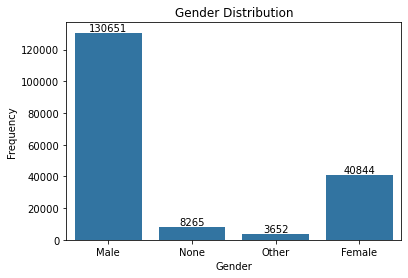

In [46]:
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='member_gender', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("Gender Distribution");

### Observations

#### Gender for 8265 members is missing. The majority of the members are males (71.23 percent) while females are just 22.27 percent. 

### Question 
##### What is the frequency of user types?

### Visualization

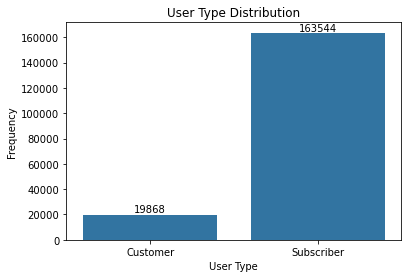

In [47]:
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='user_type', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('User Type');
plt.ylabel('Frequency');
plt.title("User Type Distribution");

### Observation 

#### 89.17 percent of the members are subsrcibers. 

### Question 
##### What is the frequency of bike sharing for all trips?

### Visualization

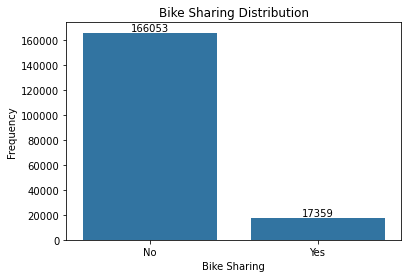

In [48]:
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='bike_share_for_all_trip', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Bike Sharing');
plt.ylabel('Frequency');
plt.title("Bike Sharing Distribution");

### Observations


#### 90.54 percent of the members did not share bike for trips. 

### Question 
##### How many trips started on different days?

### Visualization

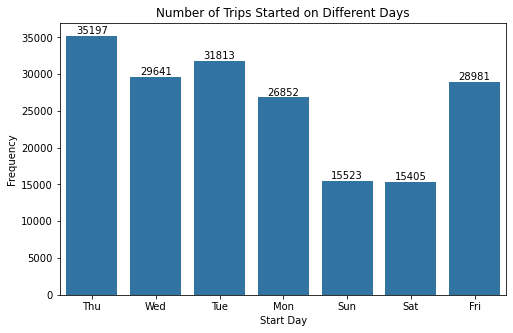

In [49]:
plt.figure(figsize = [8, 5]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='start_day', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Start Day');
plt.ylabel('Frequency');
plt.title("Number of Trips Started on Different Days");

### Observations


#### Most trips started on Thursday, followed by Tuesday, Wednesday, Friday, Monday, Sunday, and Saturday. 

### Question 
##### How many trips ended on different days?

### Visualization

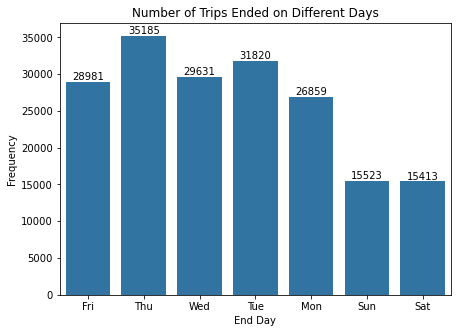

In [50]:
plt.figure(figsize = [7, 5]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='end_day', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('End Day');
plt.ylabel('Frequency');
plt.title("Number of Trips Ended on Different Days");

### Observations


#### Most trips ended on Thursday, followed by Tuesday, Wednesday, Friday, Monday, Sunday, and Saturday.

### Question 
##### How many trips started on different part of the day?

### Visualization

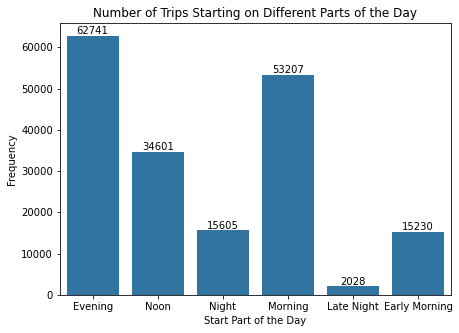

In [51]:
plt.figure(figsize = [7, 5]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='start_daypart', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Start Part of the Day');
plt.ylabel('Frequency');
plt.title("Number of Trips Starting on Different Parts of the Day");

### Observations


#### Most trips started in the evening, followed by morning, noon, night, early morning, and late night. 

### Question 
##### How many trips ended on different parts of the day?

### Visualization

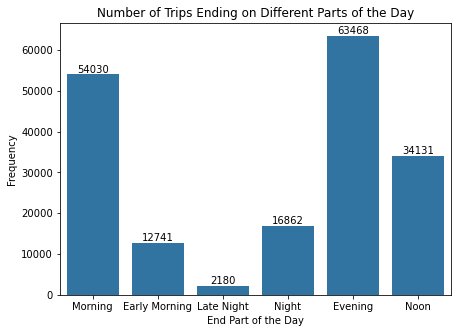

In [52]:
plt.figure(figsize = [7, 5]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='end_daypart', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('End Part of the Day');
plt.ylabel('Frequency');
plt.title("Number of Trips Ending on Different Parts of the Day");

### Observations


#### Most trips ended in the evening, followed by morning, noon, night, early morning, and late night. 

### Question 
##### Trips started and ended on which days?

### Visualization

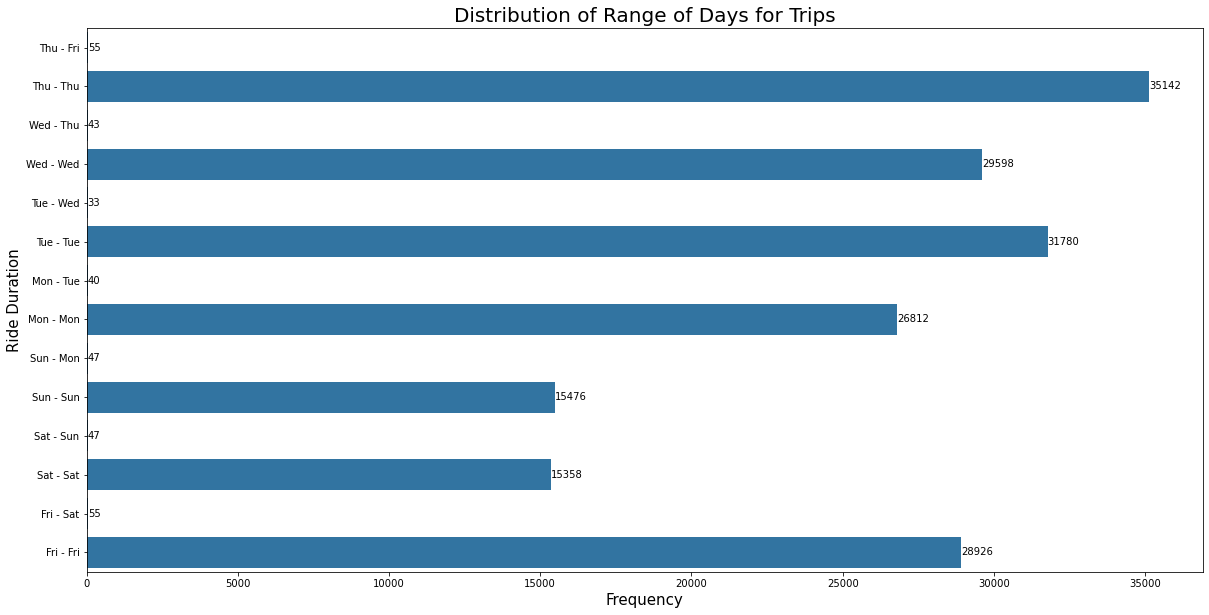

In [53]:
plt.figure(figsize = [20, 10]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, y='start_end_days', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Frequency', fontsize = 15);
plt.ylabel('Ride Duration', fontsize = 15);
plt.title("Distribution of Range of Days for Trips", fontsize = 20);

### Observations


#### Most trips started and ended on Thursday. 

### Question 
##### Trips started and ended on which days?

### Visualization

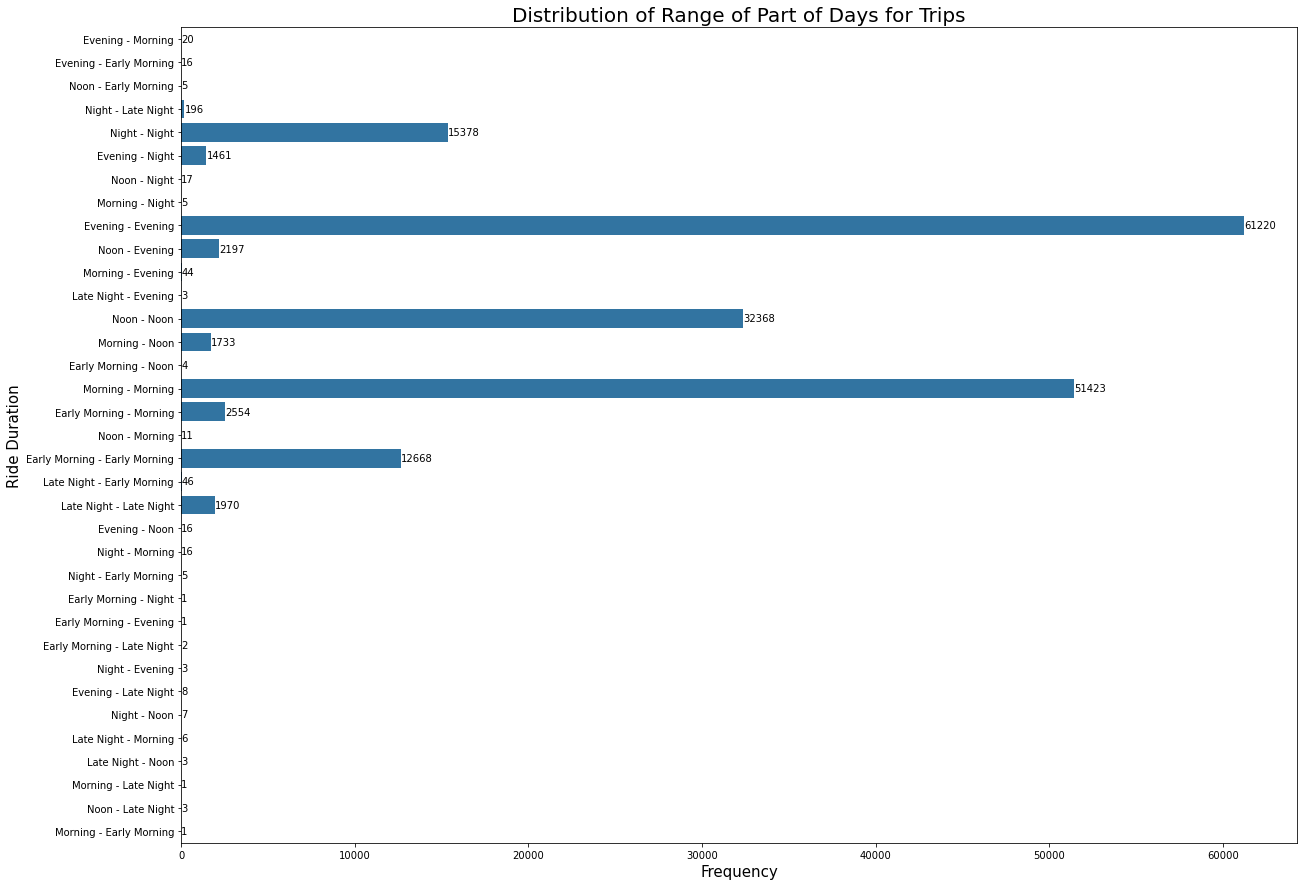

In [54]:
plt.figure(figsize = [20, 15]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, y='part_days', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Frequency', fontsize = 15);
plt.ylabel('Ride Duration', fontsize = 15);
plt.title("Distribution of Range of Part of Days for Trips", fontsize = 20);

### Observations


#### Most trips started and ended in the evening. 


### Question 
##### Which birth year has most members?

### Visualization

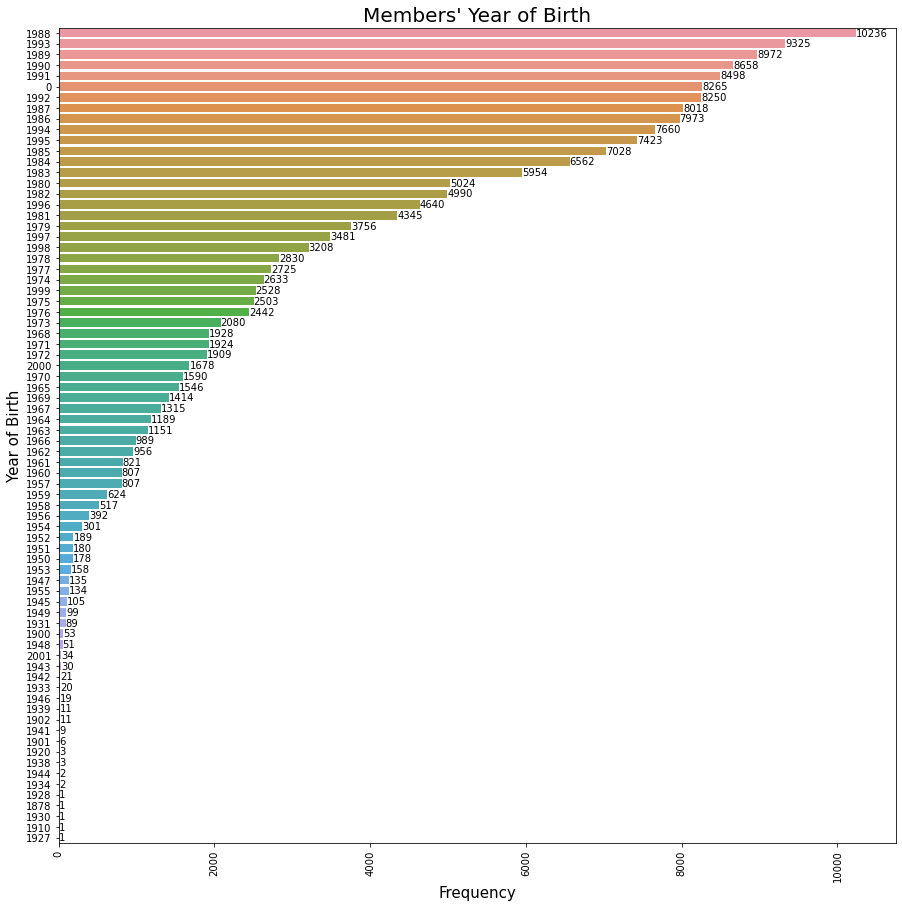

In [55]:
freq = bikedata2['member_birth_year'].value_counts()
gen_order = freq.index
plt.figure(figsize = [15, 15]) 
ax = sns.countplot(data=bikedata2, y='member_birth_year', order=gen_order);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90)
plt.xlabel('Frequency', fontsize = 15);
plt.ylabel('Year of Birth', fontsize = 15);
plt.title("Members' Year of Birth", fontsize = 20);

### Observations


#### Year of birth for 8265 members is missing. One member was born in 1878. 10,236 members were born in 1988 representing the highest frequency in terms of year of birth, followed by 1993, 1989, 1990, and more.

### Question 
##### Which generation has most members?

### Visualization

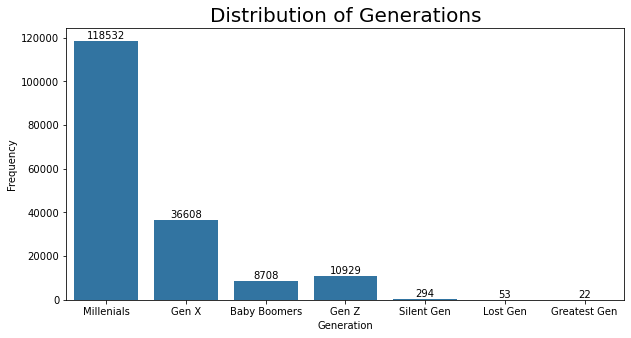

In [56]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
ax = sns.countplot(data=bikedata2, x='Gen', color=base_color)
ax.bar_label(ax.containers[0]);
plt.xlabel('Generation');
plt.ylabel('Frequency');
plt.title("Distribution of Generations", fontsize = 20);

### Observations


#### 67.68% of the members are Millennials, followed by Generation X (20.9%), Baby boomers (4.97%), Generation Z, Silent Generation, Lost Generation, and Greatest Generation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not observe any unusual data points, except for a member whose birth year is 1878. Hence, there was no need for any transformations. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Start_time and end_time columns were not in datetime format, so I converted them. Member birth year column was converted to int datatype as it was float. 8265 birth years were not available, thereby prompting replacement with 0. The distance was calculated using the longitude and latitude. The time in seconds was converted to hours. The time was used to get the days of the week and part of the day for trips. 

## Bivariate Exploration

> In this section, I am investigating relationships between pairs of variables in the bike sharing data.

### Question 
##### What is the distribution of user types based on gender?

### Visualization

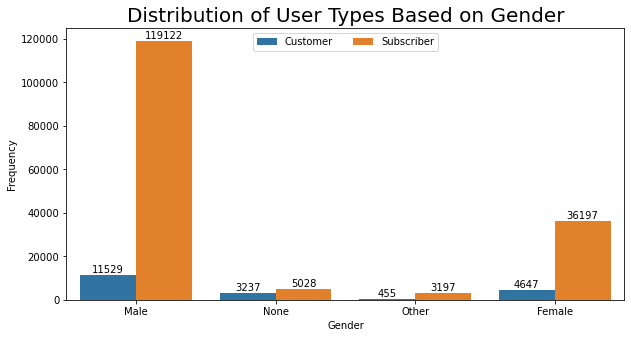

In [79]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x='member_gender', hue="user_type")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("Distribution of User Types Based on Gender", fontsize = 20);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation 
The majority of the subscribers were males.  

### Question 
##### What is the distribution of bike sharing based on gender?

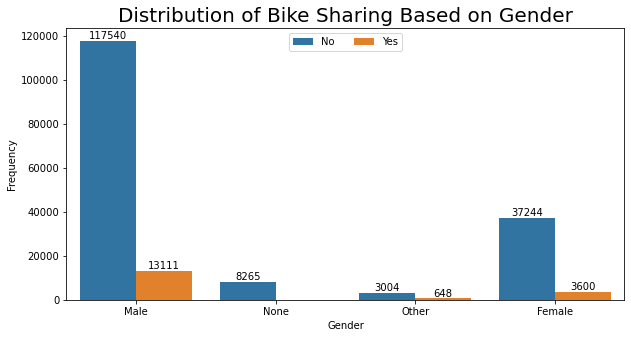

In [23]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x='member_gender', hue="bike_share_for_all_trip")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("Distribution of Bike Sharing Based on Gender", fontsize = 20);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Males shared their trips the most

### Question
How many customers and subscribers shared their trips?

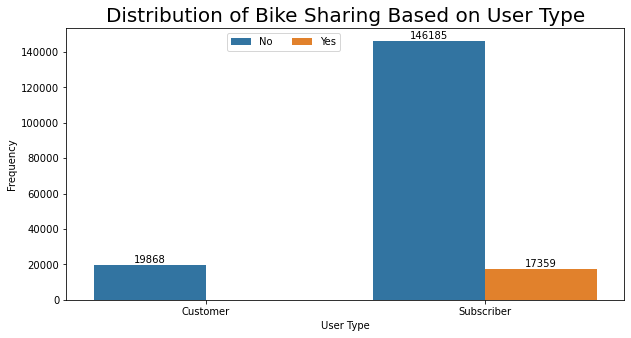

In [29]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x='user_type', hue="bike_share_for_all_trip")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('User Type');
plt.ylabel('Frequency');
plt.title("Distribution of Bike Sharing Based on User Type", fontsize = 20);
sns.move_legend(
    ax, "upper right",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

None of the customers shared their trips while the majority of the subscribers did not share their trips. 

### Question 
##### What is the distribution of bike sharing based on generation?

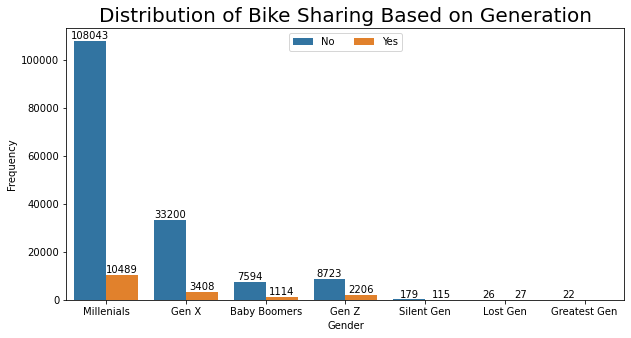

In [77]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x='Gen', hue="bike_share_for_all_trip")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("Distribution of Bike Sharing Based on Generation", fontsize = 20);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Millennials shared and did not share their trips the most. 

### Question
How many customers and subscribers started their trips on different parts of the day?

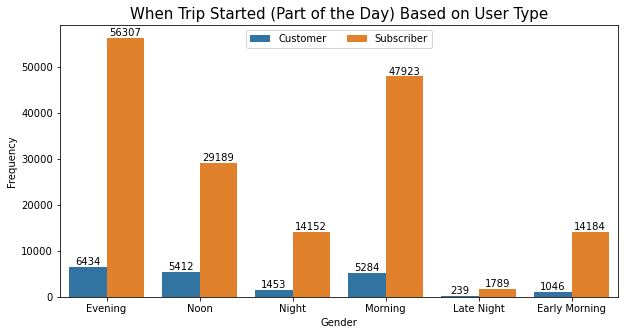

In [76]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x="start_daypart", hue="user_type");
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("When Trip Started (Part of the Day) Based on User Type", fontsize = 15);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Subscribers started their trips mostly in the evening and morning. 

### Question
How many customers and subscribers ended their trips on different parts of the day?

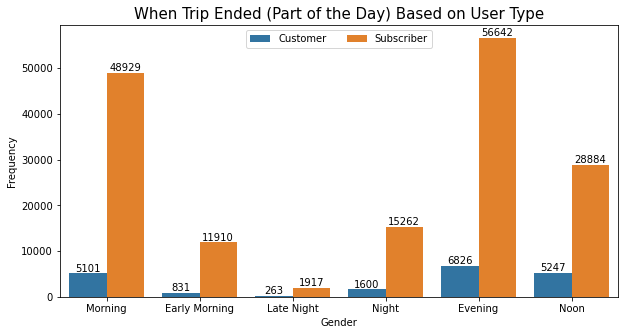

In [75]:
plt.figure(figsize = [10, 5]) 
ax = sns.countplot(data=bikedata2, x="end_daypart", hue="user_type");
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("When Trip Ended (Part of the Day) Based on User Type", fontsize = 15);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Subscribers ended their trips mostly in the evening and morning. 

### Question
What is the distribution of the days customers and subscribers started and ended their trips?

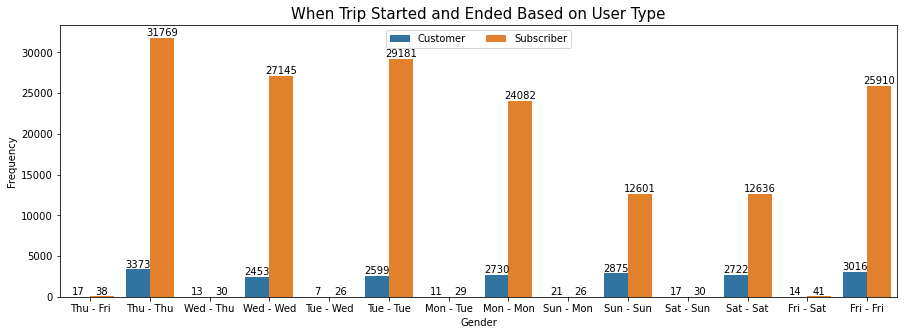

In [74]:
plt.figure(figsize = [15, 5]) 
ax = sns.countplot(data=bikedata2, x="start_end_days", hue="user_type");
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title("When Trip Started and Ended Based on User Type", fontsize = 15);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Most subscribers started and ended their trips on Thursday.

### Question
What is the distribution of the parts of the day customers and subscribers started and ended their trips?

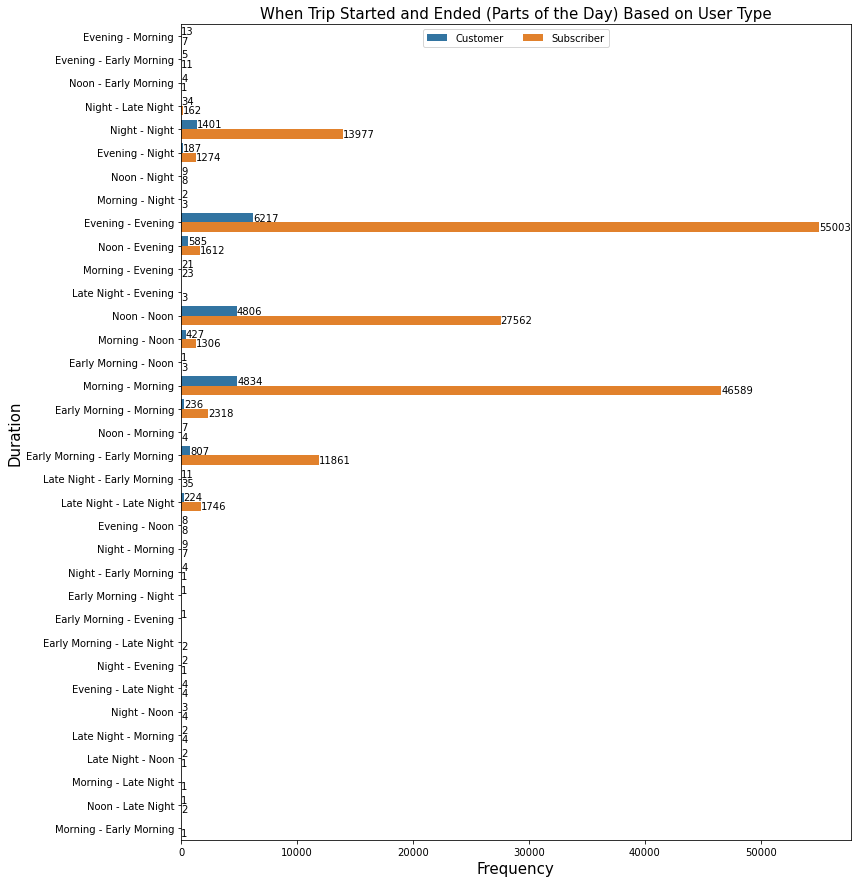

In [84]:
plt.figure(figsize = [12, 15]) 
ax = sns.countplot(data=bikedata2, y="part_days", hue="user_type");
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Frequency', fontsize = 15);
plt.ylabel('Duration', fontsize = 15);
plt.title("When Trip Started and Ended (Parts of the Day) Based on User Type", fontsize = 15);
sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

### Observation
Subscribers started and ended their trips mostly in the evening. 

### Question
What is the mean distance travelled by members based on generations?

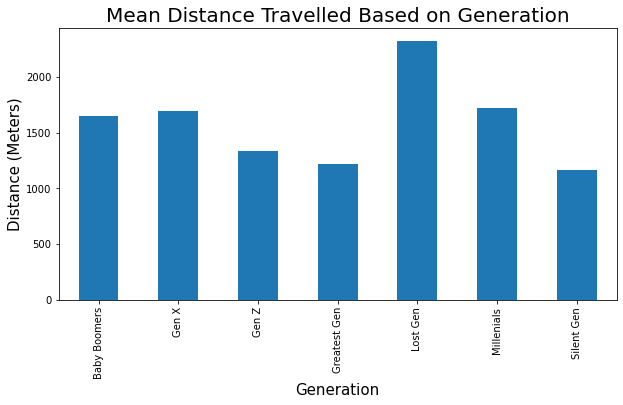

In [87]:
plt.figure(figsize = [10, 5]) 
bikedata2.groupby('Gen').distance_meters.mean().plot(kind= 'bar');
plt.xlabel('Generation', fontsize=15);
plt.ylabel('Distance (Meters)', fontsize=15);
plt.title("Mean Distance Travelled Based on Generation", fontsize = 20);

### Observations
Lost Generation traveled the longest distance, despite being born within 1883 and 1900. 

### Question
What is the average time of travel per generation?

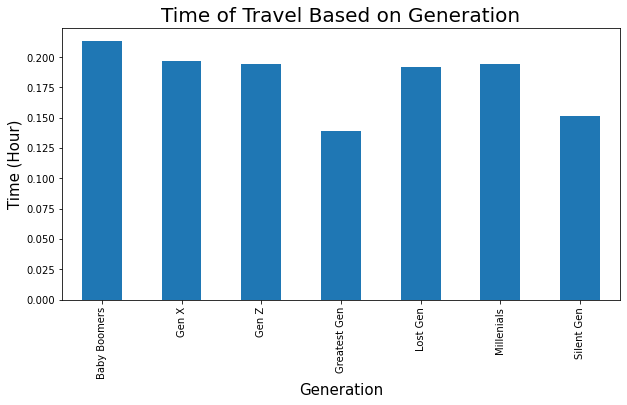

In [88]:
plt.figure(figsize = [10, 5]) 
bikedata2.groupby('Gen').time_hour.mean().plot(kind= 'bar');
plt.xlabel('Generation', fontsize=15);
plt.ylabel('Time (Hour)', fontsize=15);
plt.title("Time of Travel Based on Generation", fontsize = 20);

### Observation
Baby boomers spent more time on trips. 

### Question
What is the average time of travel by members based on user type?

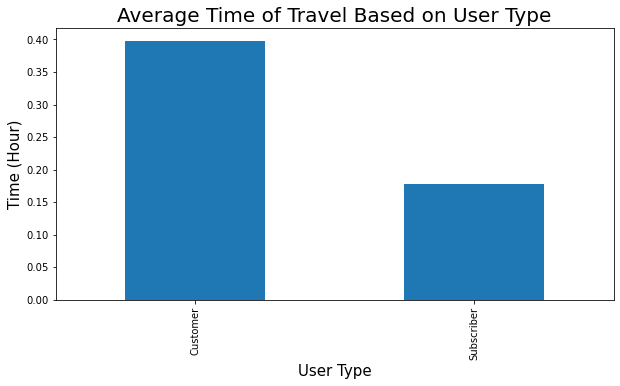

In [30]:
plt.figure(figsize = [10, 5]) 
bikedata2.groupby('user_type').time_hour.mean().plot(kind= 'bar');
plt.xlabel('User Type', fontsize=15);
plt.ylabel('Time (Hour)', fontsize=15);
plt.title("Average Time of Travel Based on User Type", fontsize = 20);

### Observation
Customers spent more time. 

### Question
Average distance travelled based on the parts of the day

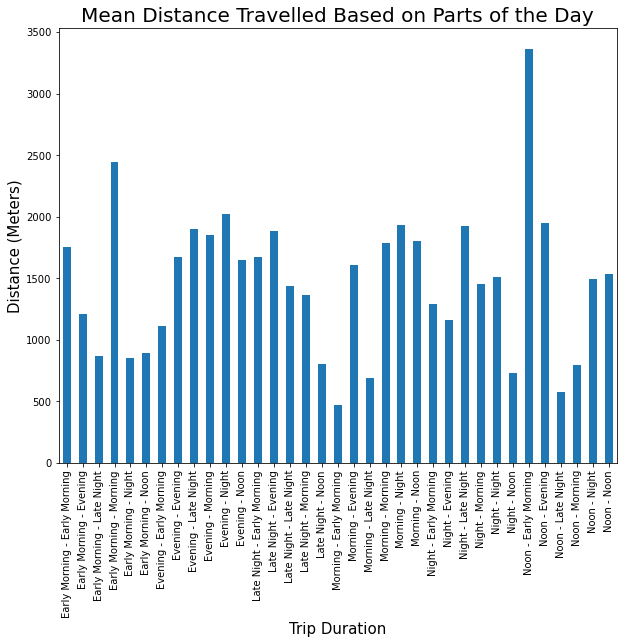

In [94]:
plt.figure(figsize = [10, 8]) 
bikedata2.groupby('part_days')['distance_meters'].mean().plot(kind='bar');
plt.xlabel('Trip Duration', fontsize=15);
plt.ylabel('Distance (Meters)', fontsize=15);
plt.title("Mean Distance Travelled Based on Parts of the Day", fontsize = 20);

### Observations
The highest average distance was for trips between noon and early morning. 

### Question
Average time of travel based on part of the day.

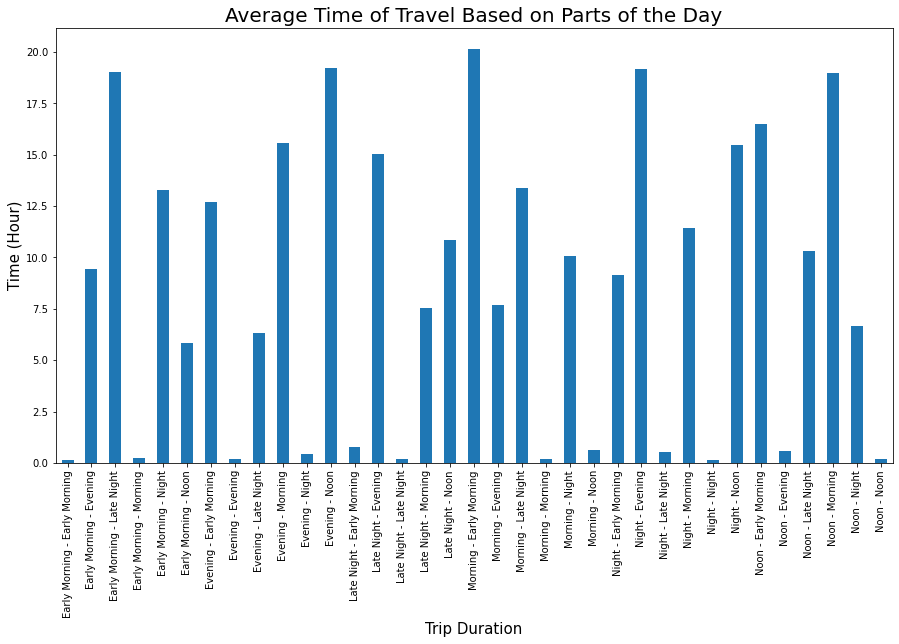

In [95]:
plt.figure(figsize = [15, 8]) 
bikedata2.groupby('part_days')['time_hour'].mean().plot(kind='bar');
plt.xlabel('Trip Duration', fontsize=15);
plt.ylabel('Time (Hour)', fontsize=15);
plt.title("Average Time of Travel Based on Parts of the Day", fontsize = 20);

### Observation
The highest average time of travel was for trips between morning and early morning 

### Question
Average distance travelled based on days of the week.

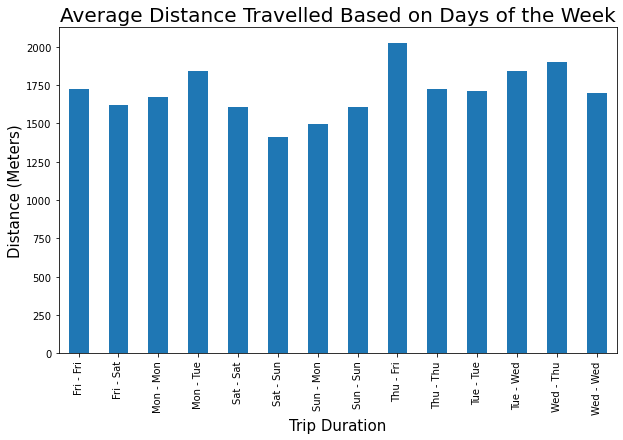

In [104]:
plt.figure(figsize = [10, 6]) 
bikedata2.groupby('start_end_days')['distance_meters'].mean().plot(kind='bar');
plt.xlabel('Trip Duration', fontsize=15);
plt.ylabel('Distance (Meters)', fontsize=15);
plt.title("Average Distance Travelled Based on Days of the Week", fontsize = 20);

### Observation
The highest average distance was for trips between Thursday and Friday.

### Question
Average time of travel based on the days of the week.

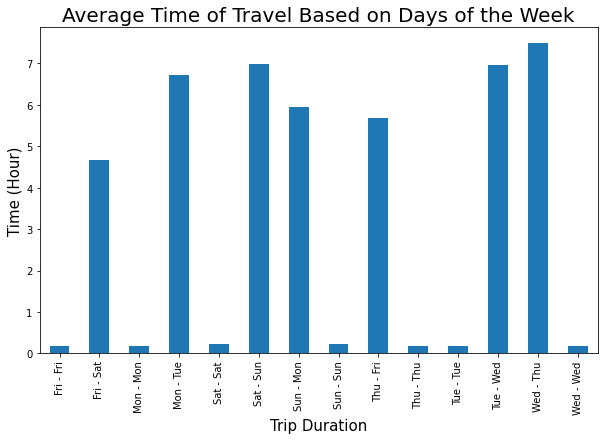

In [103]:
plt.figure(figsize = [10, 6]) 
bikedata2.groupby('start_end_days')['time_hour'].mean().plot(kind='bar');
plt.xlabel('Trip Duration', fontsize=15);
plt.ylabel('Time (Hour)', fontsize=15);
plt.title("Average Time of Travel Based on Days of the Week", fontsize = 20);

### Observation
The highest average time of travel was for trips between Wednesday and Thursday

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I expected that the younger the individual, the longer the distance covered and time spent. However, members between 1946 and 1964 (Baby Boomers) spent more time on trips. As for a possible a link between type of user and bike sharing for trips, none of the customers shared their trips while the majority of the subscribers also did not share their trips. Regarding a possible link between gender and time of travel, members whose gender is not available spent more time on the average, followed by those whose gender was 'other than male and female'. Females spent more time than male. In terms of distance between start station and end station, 'female' and 'other' genders spent more time. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of the subscribers were males. Millennials shared and did not share their trips the most. Subscribers started their trips mostly in the evening and morning. Subscribers ended their trips mostly in the evening and morning. Most subscribers started and ended their trips on Thursday. Subscribers started and ended their trips mostly in the evening.

## Multivariate Exploration

> I want to further look into whether distance and time of time travel depend on gender, user type, time of the day, and day of the week.

Look into the average distance covered and time spent by subscribers and customers. 

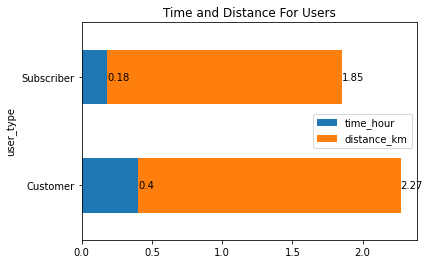

In [68]:
ax = bikedata2.groupby('user_type').mean().round(2)[['time_hour', 'distance_km']].plot(
    kind='barh', title='Time and Distance For Users', stacked=True);
for container in ax.containers:
    ax.bar_label(container)

Customers spent more time and covered more distance than subscribers. 

Look into the average distance covered and time spent by different genders.

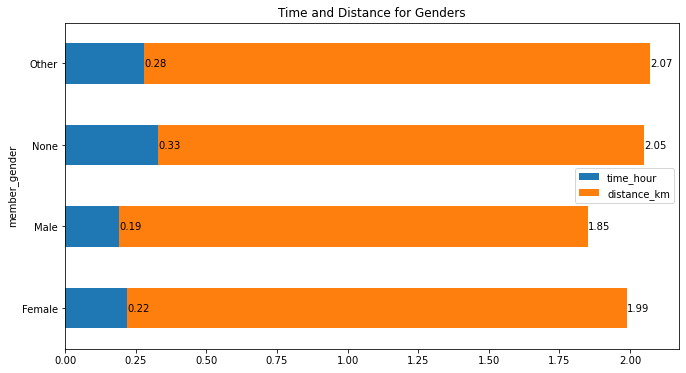

In [58]:
ax = bikedata2.groupby('member_gender').mean().round(2)[['time_hour', 'distance_km']
                                         ].plot(kind='barh', stacked=True, 
                                                title='Time and Distance for Genders', 
                                                figsize= (11,6));
for container in ax.containers:
    ax.bar_label(container)

Members whose gender is not available spent more time on the average, followed by those whose gender was 'other than male and female'. Other gender travelled more distance than other genders. Females spent more time than male. 

Look into the average distance covered and time spent on days of the week.

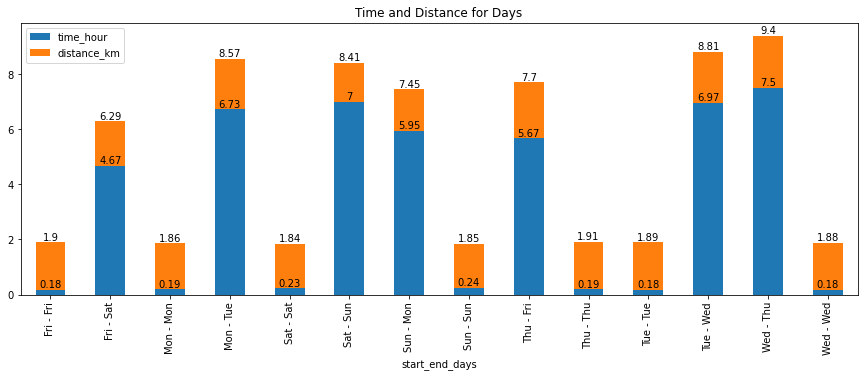

In [73]:
ax = bikedata2.groupby('start_end_days').mean().round(2)[['time_hour', 'distance_km']
                                          ].plot(kind='bar', stacked=True, figsize= (15,5), title='Time and Distance for Days');
for container in ax.containers:
    ax.bar_label(container)

Members who started their trip on Wednesday and ended it on Thursday travelled more distance and also spent more time. 

Look into the average distance covered and time spent on different parts of the days

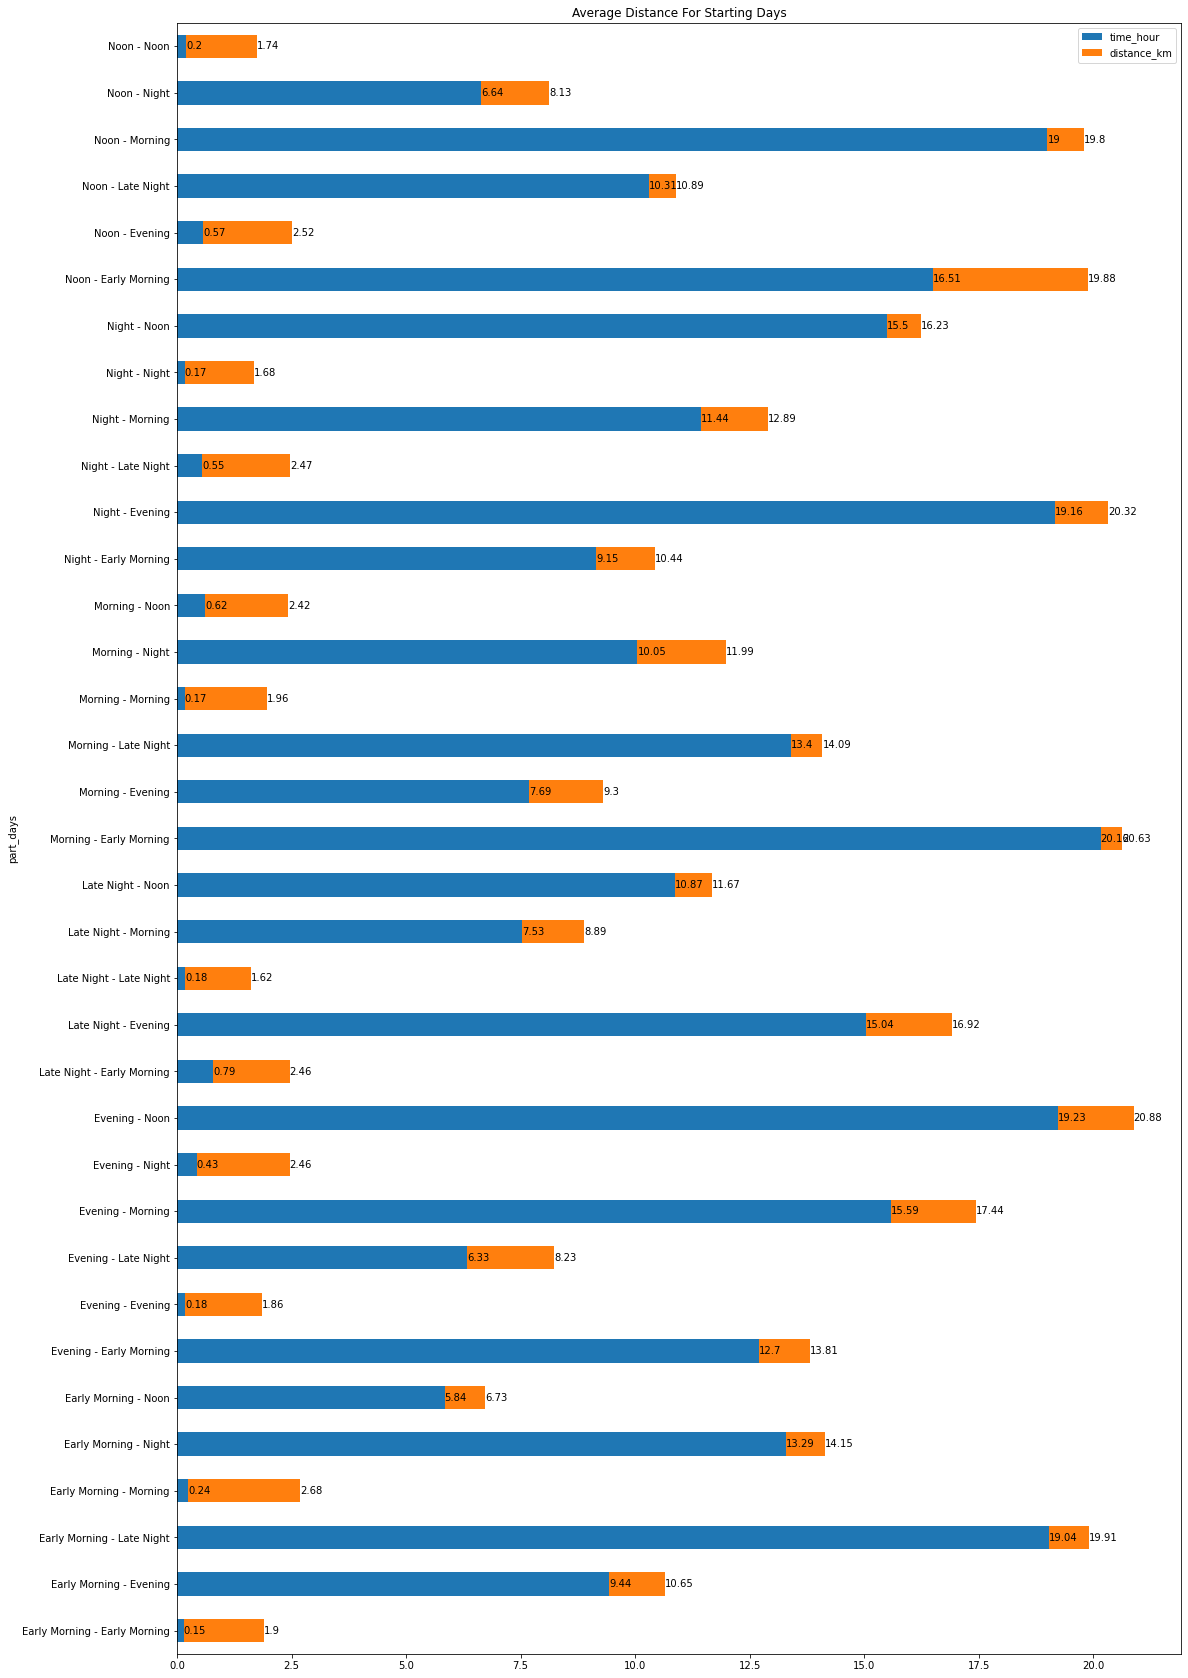

In [80]:
ax = bikedata2.groupby('part_days').mean().round(2)[['time_hour', 'distance_km']].plot(kind='barh', stacked=True,
                                                                         title='Average Distance For Starting Days', figsize=(18, 30));
for container in ax.containers:
    ax.bar_label(container)

Members travelled more distance and spent more time on trips between morning and early morning. 

Explore the distance and time by Baby Boomers 

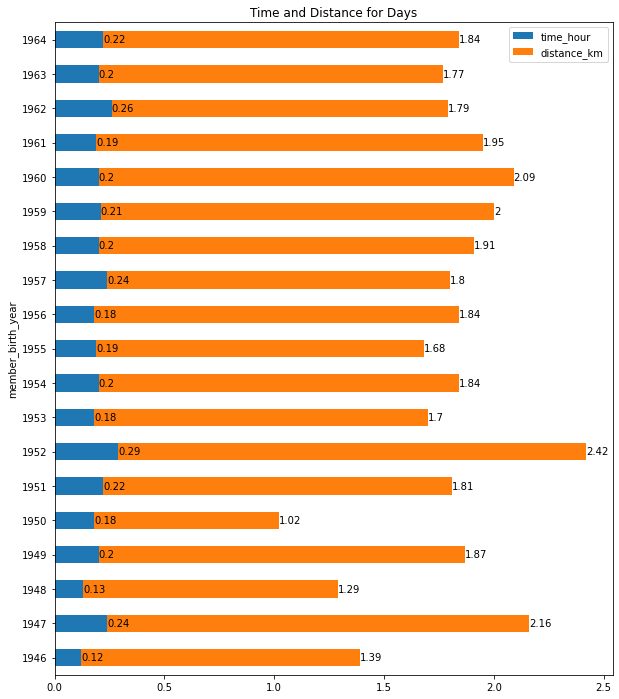

In [67]:
ax = baby_boomers.groupby('member_birth_year').mean().round(2)[['time_hour', 'distance_km']
                                          ].plot(kind='barh', stacked=True, figsize= (10,12), title='Time and Distance for Days');
for container in ax.containers:
    ax.bar_label(container)

Baby Boomers born in 1952 spent more time and traveled longest distance. 

Look into distance and time for bike sharing trips 

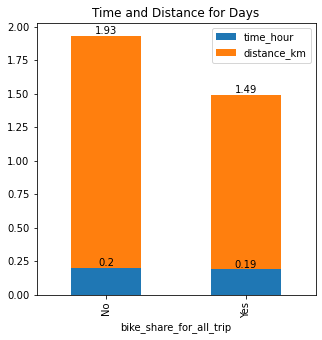

In [87]:
ax = bikedata2.groupby('bike_share_for_all_trip').mean().round(2)[['time_hour', 'distance_km']
                                          ].plot(kind='bar', stacked=True, figsize= (5,5), title='Time and Distance for Days');
for container in ax.containers:
    ax.bar_label(container)

Time spent and distance traveled were higher for trips without bike sharing 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is interesting that trips which started on Wednesday and ended on Thursday, as well as between morning and early morning involved more distance and time.  

### Were there any interesting or surprising interactions between features?

> Members born in 1952 spent more time and traveled longest distance.

## Conclusions
>I converted data type for start_time and end_time to datetime, as well as member_birth_year to int. I filled all missing values as required, calculated distances between the stations for each trip using the longitudes and latitudes, got the times of the day and day of the week for each trip, and categorized the year of births to generations. Interestingly, 71.23% of the members are males, 89.17% are subscribers, 90.54% did not share bike for trips, most trips started and ended on Thursday and in the evening, 10,236 members were born in 1988 representing the highest frequency in terms of year of birth, 111532 members are Millennials followed by 36,608 members belonging to Gen X. 

>Members between 1946 and 1964 (Baby Boomers) spent more time on trips against my expectation. No customer shared bike while the majority of the subscribers also did not share. Members whose gender is missing spent more time on the average, followed by those whose gender was 'other than male and female'. Females spent more time than male. In terms of distance between start station and end station, 'female' and 'other' genders spent more time. Trips that started on Wednesday and ended on Thursday, and from morning to early morning involved more distance and time. Members born in 1952 spent more time and traveled longest distance.